In [1]:
%matplotlib inline
import os
import sys
from matplotlib import pyplot as plt
cwd = os.getcwd()
assert "miriam" in cwd
sys.path.append(cwd + "/..")
import scenarios.generators
import visualization
import solvers

In [2]:
env, starts, goals = scenarios.generators.tracing_pathes_in_the_dark(16, .6, 4, 0)

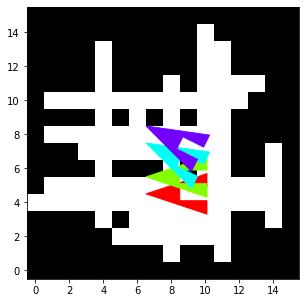

In [3]:
visualization.plot_with_arrows(env, starts, goals)
plt.show()

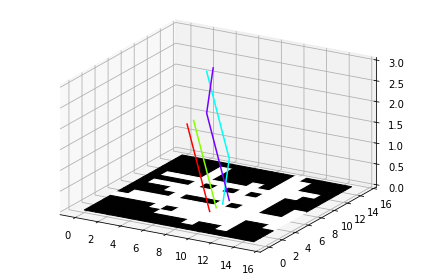

In [4]:
paths_indep = solvers.indep(env, starts, goals)
visualization.plot_with_paths(env, paths_indep)
plt.show()

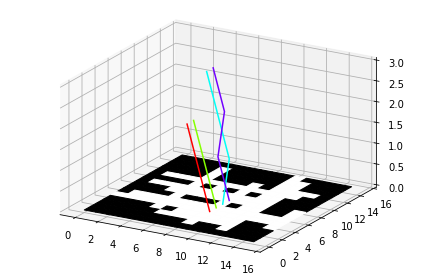

In [5]:
paths_ecbs = solvers.ecbs(env, starts, goals, return_paths=True)
visualization.plot_with_paths(env, paths_ecbs)
plt.show()

In [7]:
data_ecbs = solvers.ecbs(env, starts, goals)
print(data_ecbs)

{'statistics': {'cost': 10, 'makespan': 3, 'runtime': 0.000481119, 'highLevelExpanded': 1, 'lowLevelExpanded': 16}, 'schedule': {'agent0': [{'x': 8, 'y': 4, 't': 0}, {'x': 7, 'y': 4, 't': 1}, {'x': 6, 'y': 4, 't': 2}], 'agent1': [{'x': 8, 'y': 5, 't': 0}, {'x': 7, 'y': 5, 't': 1}, {'x': 6, 'y': 5, 't': 2}], 'agent2': [{'x': 8, 'y': 6, 't': 0}, {'x': 8, 'y': 7, 't': 1}, {'x': 7, 'y': 7, 't': 2}, {'x': 6, 'y': 7, 't': 3}], 'agent3': [{'x': 8, 'y': 7, 't': 0}, {'x': 7, 'y': 7, 't': 1}, {'x': 7, 'y': 8, 't': 2}, {'x': 6, 'y': 8, 't': 3}]}, 'blocks': {'agent0': 0, 'agent1': 0, 'agent2': 0, 'agent3': 0}}


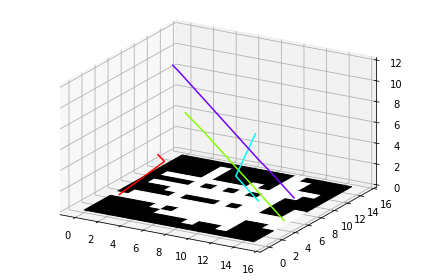

In [6]:
paths_icts = solvers.icts(env, starts, goals, return_paths=True)
visualization.plot_with_paths(env, paths_icts)
plt.show()